<a href="https://colab.research.google.com/github/Bouchrikator/sic-/blob/main/CHeckpoint0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

In [41]:
df=pd.read_csv('heart.csv')
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [49]:
from itertools import cycle
import plotly.graph_objects as go

palette = cycle(["#ffd670", "#70d6ff", "#ff4d6d", "#8338ec", "#90cf8e"])
targ = df.corrwith(df['target'], axis=0)
val = [str(round(v, 1) * 100) + '%' for v in targ.values]
fig = go.Figure()
fig.add_trace(
    go.Bar(y=targ.index,
           x=targ.values,
           orientation='h',
           text=val,
           marker_color=next(palette)))
fig.update_layout(title="Correlation of variables with Target",
                  width=1000,
                  height=500,
                  paper_bgcolor='rgb(0,0,0,0)',
                  plot_bgcolor='rgb(0,0,0,0)')

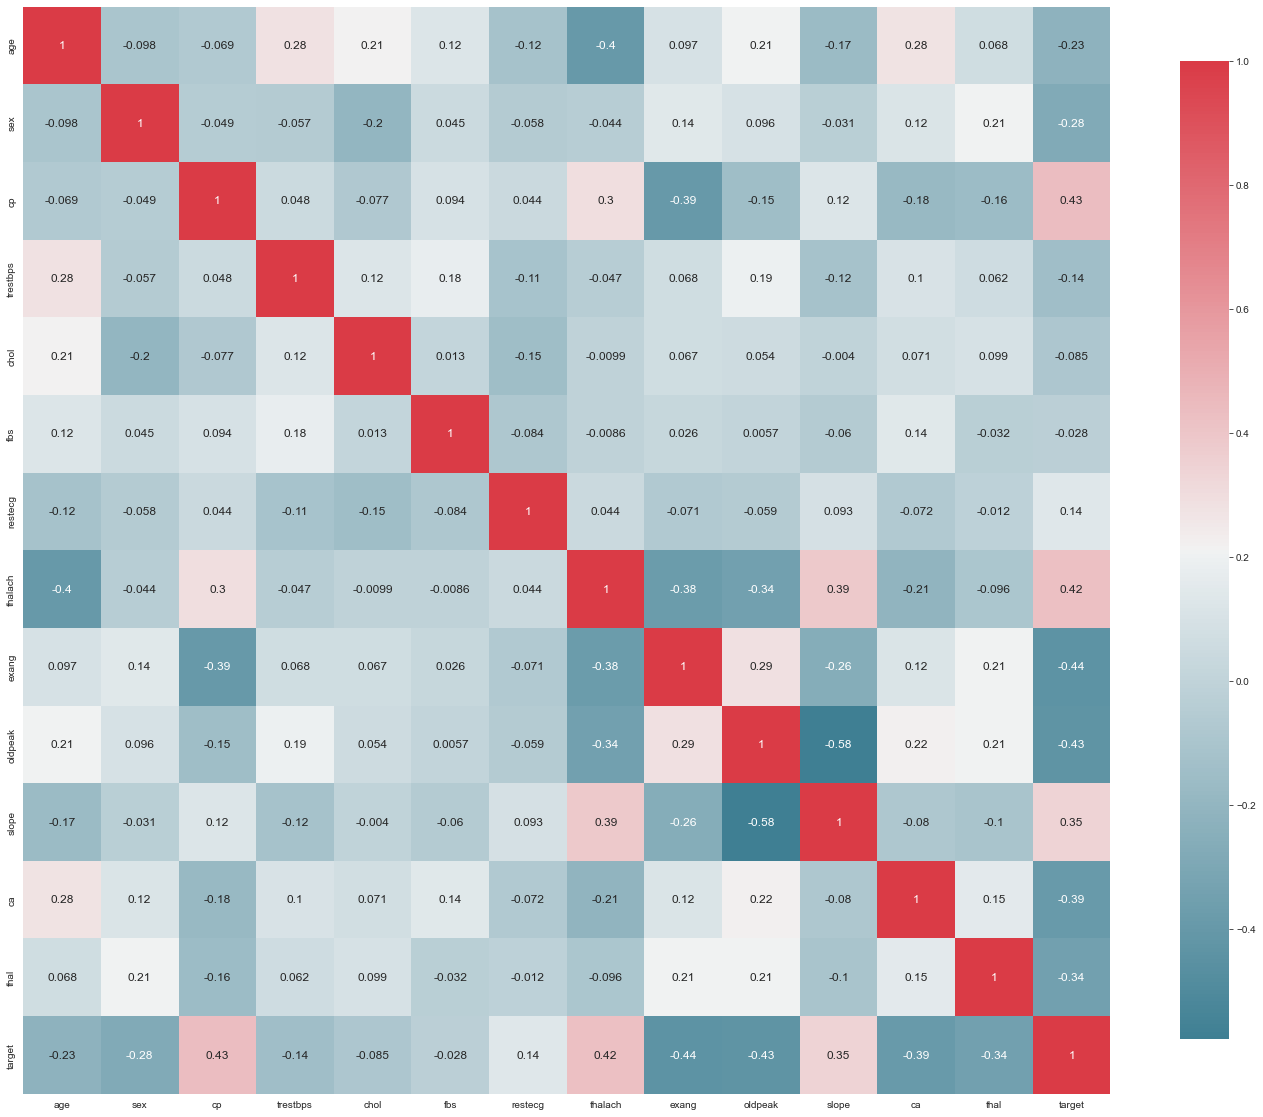

In [25]:
def plot_correlation_map(df):

    corr = df.corr()

    s, ax = plt.subplots(figsize=(25, 20))

    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    s = sns.heatmap(corr,
                    cmap=cmap,
                    square=True,
                    cbar_kws={'shrink': .9},
                    ax=ax,
                    annot=True,
                    annot_kws={'fontsize': 12})


plot_correlation_map(df)

In [23]:
df.target.value_counts(normalize = True)

1    0.544554
0    0.455446
Name: target, dtype: float64

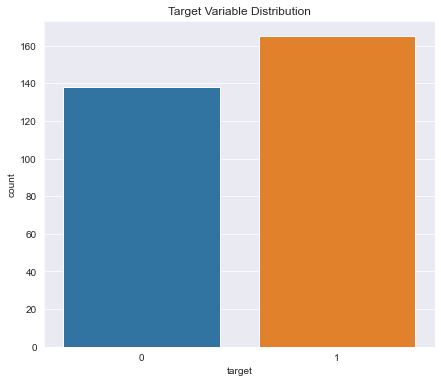

In [24]:
sns.set_style('darkgrid')
plt.figure(figsize=(7, 6))
sns.countplot(x= df.target)
plt.title('Target Variable Distribution')
plt.show()

In [5]:
X=df.drop(columns='target')
y=df['target']

In [6]:
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[303 rows x 13 columns]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4, random_state=1234)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from catboost import CatBoostClassifier
%matplotlib inline

In [26]:
model = CatBoostClassifier(verbose=100,
                           depth=7,
                           iterations=5000,
                           eval_metric="Logloss"
                          )
model.fit(X_train,Y_train)
Y_pred_test = model.predict(X_test)  

Learning rate set to 0.001135
0:	learn: 0.6921850	total: 5.33ms	remaining: 26.7s
100:	learn: 0.6084080	total: 94.1ms	remaining: 4.56s
200:	learn: 0.5392065	total: 139ms	remaining: 3.32s
300:	learn: 0.4823862	total: 186ms	remaining: 2.9s
400:	learn: 0.4355674	total: 241ms	remaining: 2.77s
500:	learn: 0.3961804	total: 287ms	remaining: 2.58s
600:	learn: 0.3616084	total: 335ms	remaining: 2.45s
700:	learn: 0.3322796	total: 384ms	remaining: 2.36s
800:	learn: 0.3068012	total: 443ms	remaining: 2.32s
900:	learn: 0.2851574	total: 490ms	remaining: 2.23s
1000:	learn: 0.2656007	total: 540ms	remaining: 2.16s
1100:	learn: 0.2478997	total: 596ms	remaining: 2.11s
1200:	learn: 0.2327127	total: 644ms	remaining: 2.04s
1300:	learn: 0.2186036	total: 692ms	remaining: 1.97s
1400:	learn: 0.2067542	total: 738ms	remaining: 1.9s
1500:	learn: 0.1956571	total: 789ms	remaining: 1.84s
1600:	learn: 0.1856317	total: 839ms	remaining: 1.78s
1700:	learn: 0.1762495	total: 886ms	remaining: 1.72s
1800:	learn: 0.1676339	total

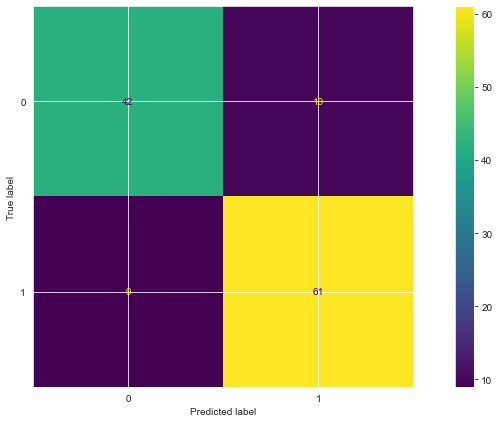

In [29]:
def conf_matrix(y_test, y_pred, model):
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    fig, ax = plt.subplots(figsize=(15,7))
    disp.plot(ax=ax)
    plt.show()
conf_matrix(Y_test, Y_pred_test, model)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred_test)

0.8442622950819673

In [31]:
FPR, TPR, cutoffs = metrics.roc_curve(Y_test,Y_pred_test,pos_label=1) 

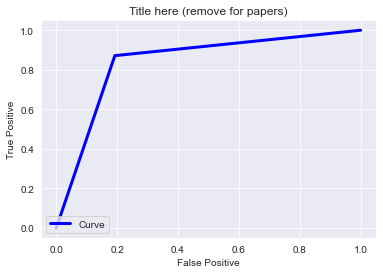

In [38]:
bp_x = FPR
bp_y = TPR

plt.plot(bp_x, bp_y, linewidth=3,
         color="blue", label=r"Curve")
plt.xlabel(r"False Positive")
plt.ylabel(r"True Positive")
plt.title(r"Title here (remove for papers)")
plt.legend(loc="lower left")
plt.show()
plt.show()

In [40]:
auc = metrics.roc_auc_score(Y_test,Y_pred_test)
print('AUC  = ', auc)

AUC  =  0.8395604395604396
